In [1]:
#import all the dependencies
import json
import csv
import pandas as pd
import numpy as np
from datetime import datetime

from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt



C:\Users\lizet\Anaconda3\envs\PythonData2\lib\site-packages\mpl_toolkits\basemap\__init__.py:1767: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()


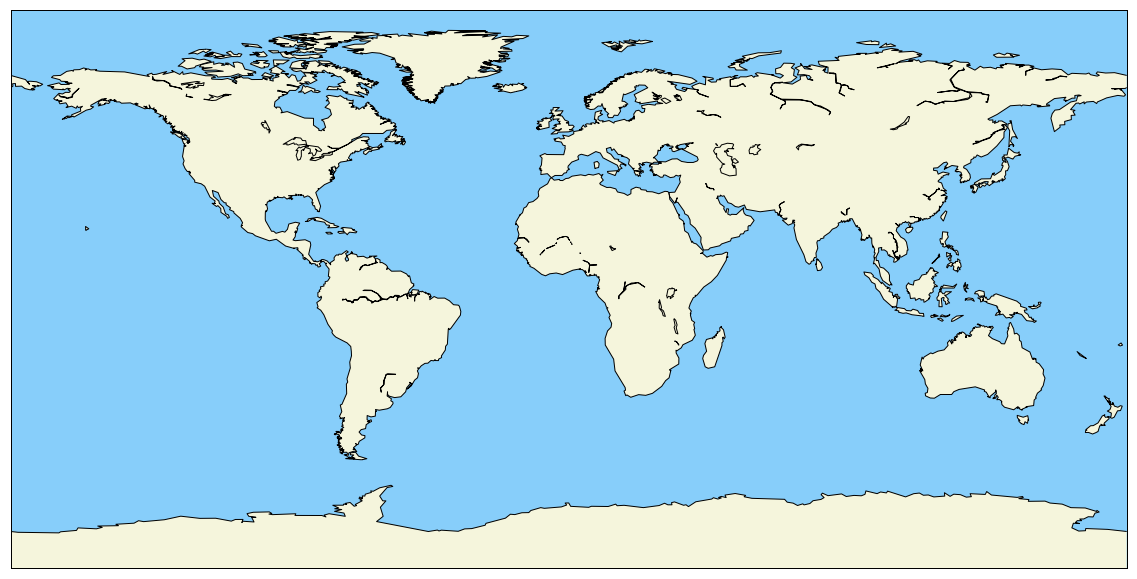

In [2]:
plt.subplots(figsize=(20,20))
map = Basemap(projection='cyl')

map.drawmapboundary(fill_color='lightskyblue')
map.fillcontinents(color='beige',lake_color='beige')
map.drawcoastlines()
# plt.gcf
plt.show()
# fig.savefig("Map.png")

In [3]:
#read the file and store it in dataframe
starbucks=pd.read_csv("directory.csv")
starbucks=starbucks.dropna(axis=1, how='all')
starbucks["Temp"]=''
starbucks.head()

,Brand,Store Number,Store Name,Ownership Type,Street Address,City,State/Province,Country,Postcode,Phone Number,Timezone,Longitude,Latitude,Temp
0,Starbucks,47370-257954,"Meritxell, 96",Licensed,"Av. Meritxell, 96",Andorra la Vella,7,AD,AD500,376818720,GMT+1:00 Europe/Andorra,1.53,42.51,
1,Starbucks,22331-212325,Ajman Drive Thru,Licensed,"1 Street 69, Al Jarf",Ajman,AJ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,55.47,25.42,
2,Starbucks,47089-256771,Dana Mall,Licensed,Sheikh Khalifa Bin Zayed St.,Ajman,AJ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,55.47,25.39,
3,Starbucks,22126-218024,Twofour 54,Licensed,Al Salam Street,Abu Dhabi,AZ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,54.38,24.48,
4,Starbucks,17127-178586,Al Ain Tower,Licensed,"Khaldiya Area, Abu Dhabi Island",Abu Dhabi,AZ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,54.54,24.51,


In [4]:
from mpl_toolkits.basemap import Basemap, cm
# requires netcdf4-python (netcdf4-python.googlecode.com)
from netCDF4 import Dataset as NetCDFFile
import numpy as np
import matplotlib.pyplot as plt

# plot rainfall from NWS using special precipitation
# colormap used by the NWS, and included in basemap.

nc = NetCDFFile('../../../examples/nws_precip_conus_20061222.nc')
# data from http://water.weather.gov/precip/
prcpvar = nc.variables['amountofprecip']
data = 0.01*prcpvar[:]
latcorners = nc.variables['lat'][:]
loncorners = -nc.variables['lon'][:]
lon_0 = -nc.variables['true_lon'].getValue()
lat_0 = nc.variables['true_lat'].getValue()
# create figure and axes instances
fig = plt.figure(figsize=(8,8))
ax = fig.add_axes([0.1,0.1,0.8,0.8])
# create polar stereographic Basemap instance.
m = Basemap(projection='stere',lon_0=lon_0,lat_0=90.,lat_ts=lat_0,\
            llcrnrlat=latcorners[0],urcrnrlat=latcorners[2],\
            llcrnrlon=loncorners[0],urcrnrlon=loncorners[2],\
            rsphere=6371200.,resolution='l',area_thresh=10000)
# draw coastlines, state and country boundaries, edge of map.
m.drawcoastlines()
m.drawstates()
m.drawcountries()
# draw parallels.
parallels = np.arange(0.,90,10.)
m.drawparallels(parallels,labels=[1,0,0,0],fontsize=10)
# draw meridians
meridians = np.arange(180.,360.,10.)
m.drawmeridians(meridians,labels=[0,0,0,1],fontsize=10)
ny = data.shape[0]; nx = data.shape[1]
lons, lats = m.makegrid(nx, ny) # get lat/lons of ny by nx evenly space grid.
x, y = m(lons, lats) # compute map proj coordinates.
# draw filled contours.
clevs = [0,1,2.5,5,7.5,10,15,20,30,40,50,70,100,150,200,250,300,400,500,600,750]
cs = m.contourf(x,y,data,clevs,cmap=cm.s3pcpn)
# add colorbar.
cbar = m.colorbar(cs,location='bottom',pad="5%")
cbar.set_label('mm')
# add title
plt.title(prcpvar.long_name+' for period ending '+prcpvar.dateofdata)
plt.show()

IOError: No such file or directory

In [ ]:
fig, ax = plt.subplots(figsize=(20,20))

ax.scatter(starbucks['Latitude'],starbucks['Longitude'], marker="o", color="green", alpha=0.4, edgecolors="black", linewidth=1) 

ax.grid(True)
ax.set_title('Starbucks Latitude vs Starbucks Longtitude %s' % datetime.today())
ax.set_xlabel('Latitude')
ax.set_ylabel('Longitude')
ax.set_xlim(starbucks['Latitude'].min()-5, starbucks['Latitude'].max()+5)
ax.set_ylim(starbucks['Longitude'].min()-5, (starbucks['Longitude'].max()+5))
plt.show()